In [1]:
import torch
from PIL import Image
import os
import matplotlib.pyplot as plt
import numpy as np
from tqdm import tqdm
import torch.nn as nn
import torch.optim as optim
import torchvision.transforms as transforms
from torch.utils.tensorboard import SummaryWriter
from get_loader import get_loader
from model import CNNtoRNN

## We loaded the pretrained model on 100 epochs.

In [2]:
model = torch.load('image-captioning-model.pth')
model.eval()

CNNtoRNN(
  (encoderCNN): EncoderCNN(
    (inception): Inception3(
      (Conv2d_1a_3x3): BasicConv2d(
        (conv): Conv2d(3, 32, kernel_size=(3, 3), stride=(2, 2), bias=False)
        (bn): BatchNorm2d(32, eps=0.001, momentum=0.1, affine=True, track_running_stats=True)
      )
      (Conv2d_2a_3x3): BasicConv2d(
        (conv): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1), bias=False)
        (bn): BatchNorm2d(32, eps=0.001, momentum=0.1, affine=True, track_running_stats=True)
      )
      (Conv2d_2b_3x3): BasicConv2d(
        (conv): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn): BatchNorm2d(64, eps=0.001, momentum=0.1, affine=True, track_running_stats=True)
      )
      (Conv2d_3b_1x1): BasicConv2d(
        (conv): Conv2d(64, 80, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (bn): BatchNorm2d(80, eps=0.001, momentum=0.1, affine=True, track_running_stats=True)
      )
      (Conv2d_4a_3x3): BasicConv2d(
        (conv): Co

## Loading the dataset with getloader file and also using some transforms for image.

In [3]:
transform = transforms.Compose(
    [
        transforms.Resize((299, 299)),
        transforms.ToTensor(),
        transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5)),
    ]
)

In [4]:
train_loader, dataset = get_loader(
        root_folder="flickr8k/images",
        annotation_file="flickr8k/captions.txt",
        transform=transform,
        num_workers=2,
    )

## Function to caption all images and display them

In [7]:
def caption_all_images(image_paths):
    count = 0
    for img_path in image_paths:
        count = count + 1
        print("Image ", count)
        plt.figure(figsize=(6,4))
        full_path = 'test_examples/' + img_path
        img = transform(Image.open(full_path).convert("RGB")).unsqueeze(0)
        caption = ' '.join(model.caption_image(img.to('cuda'), dataset.vocab)[1:-1])
        read_img = plt.imread(full_path)
        plt.imshow(np.real(read_img))
        plt.axis("on")
        plt.title(caption)
        plt.show()
        print("\n")

# Final Output:

Image  1


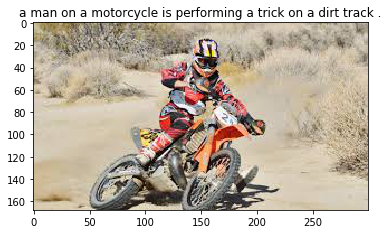



Image  2


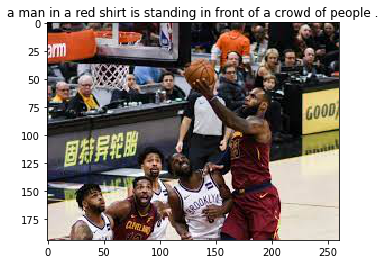



Image  3


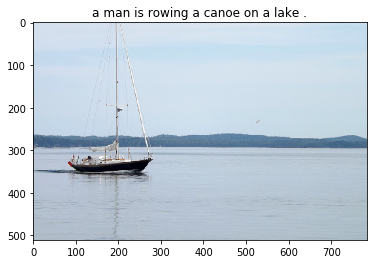



Image  4


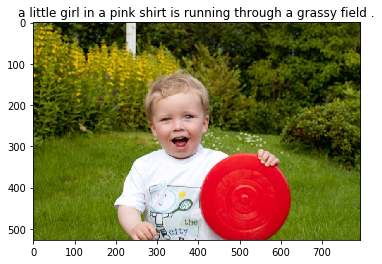



Image  5


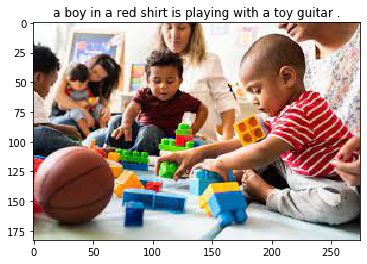



Image  6


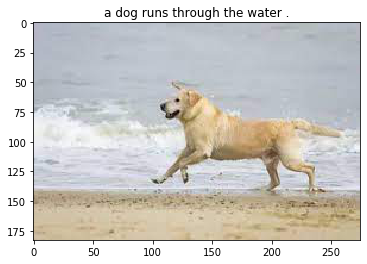



Image  7


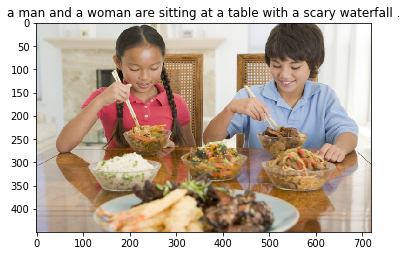



Image  8


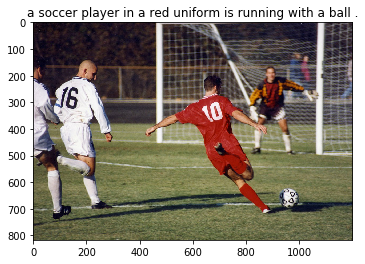



Image  9


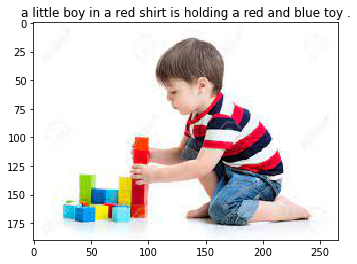



Image  10


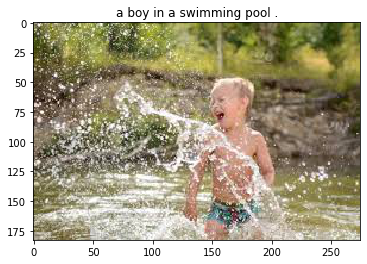



Image  11


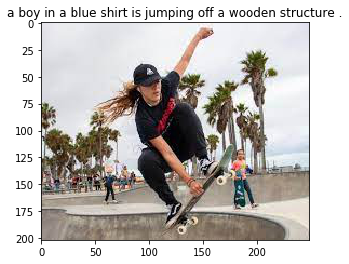



Image  12


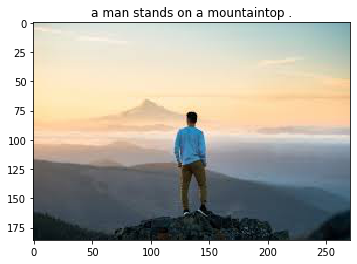



Image  13


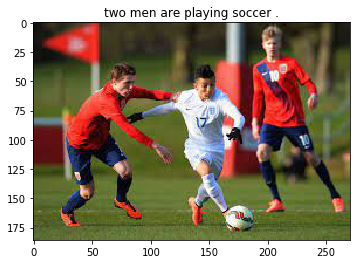



Image  14


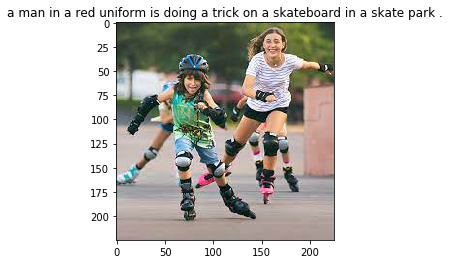



Image  15


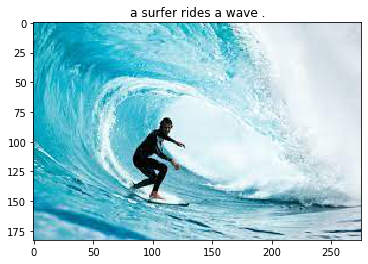

In [8]:
caption_all_images(os.listdir('test_examples'))